In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union

# Read the Data

In [4]:
data = pd.read_csv('./data/data.csv', names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


# Create Custom Functions to use

### Functions for Plotting

In [5]:
# fig_lines = go.Figure()
def plot_points(data: pd.DataFrame):
    admitted = data.loc[data.y == 1,:]
    rejected = data.loc[data.y == 0,:]

    xaxis_admitted = admitted.x1.tolist()
    yaxis_admitted = admitted.x2.tolist()
    xaxis_rejected = rejected.x1.tolist()
    yaxis_rejected = rejected.x2.tolist()

    plt.scatter(xaxis_rejected, yaxis_rejected, s=25,
                color = 'blue', edgecolor = 'k')
    plt.scatter(xaxis_admitted, yaxis_admitted, s=25,
                color = 'red', edgecolor = 'k')
    
def display(m: np.ndarray, b:np.ndarray, color='g--'):
    plt.xlim(0.005, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10,0.1)
    plt.plot(x, m.flatten()*x+b.flatten(), color)

### Plot the data

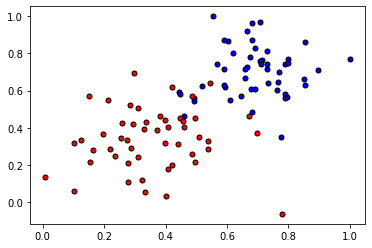

In [6]:
plot_points(data)
plt.show()

# Gradient Descent

### Helper functions

In [7]:
# Sigmoid functions
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1/(1 + np.exp(-x))


# Node output functions
def node_output(x:np.ndarray, weights:np.ndarray, bias:np.ndarray) -> float:
    score = np.dot(weights, x) + bias
    return sigmoid(score)


# Error functions
def error_calc(output:Union[float, np.ndarray] , targets:Union[float, np.ndarray]) -> float:
    error = -( (targets * np.log(output)) + ((1-targets)* np.log(1 - output)) )
    return np.mean(error)


# Delta funtions
def weight_update(x:np.ndarray, targets:np.ndarray, weights:np.ndarray, 
                  bias:np.ndarray, learnrate:float) -> tuple:
    y_hat = node_output(x, weights, bias)
    delta = -(targets - y_hat)
    weights -= learnrate * delta * x.T
    bias -= delta * learnrate

    return weights, bias



### Training Algorithm


===========Epoch 0 ============
Train Loss: 0.7135845195381634
Accuracy: 0.4

===========Epoch 10 ============
Train Loss: 0.6225835210454962
Accuracy: 0.59

===========Epoch 20 ============
Train Loss: 0.5548744083669507
Accuracy: 0.74

===========Epoch 30 ============
Train Loss: 0.501606141872473
Accuracy: 0.84

===========Epoch 40 ============
Train Loss: 0.45933346418614013
Accuracy: 0.86

===========Epoch 50 ============
Train Loss: 0.42525543433469976
Accuracy: 0.93

===========Epoch 60 ============
Train Loss: 0.39734615716713984
Accuracy: 0.93

===========Epoch 70 ============
Train Loss: 0.37414697652390744
Accuracy: 0.93

===========Epoch 80 ============
Train Loss: 0.35459973368161973
Accuracy: 0.94

===========Epoch 90 ============
Train Loss: 0.33792736588799216
Accuracy: 0.94


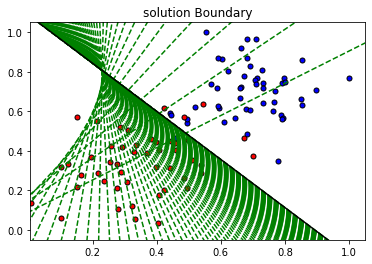

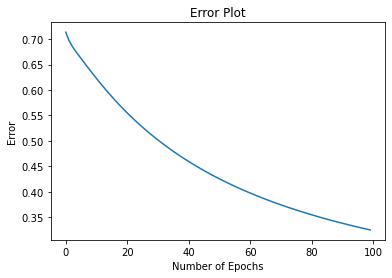

In [10]:
np.random.seed(44)


def train(data:pd.DataFrame, epochs: int =100, learnrate: float =0.01, 
          graph_lines: bool = True)-> None :

    features = data.loc[:, ['x1', 'x2']].to_numpy()
    features = features.T # shape: (num_inputs, num_samples)
    targets = data.loc[:, ['y']].to_numpy()
    targets = targets.T # Shape: (num_outputs X num_samples)
    
    feature_len, data_len  = features.shape
    target_len = targets.shape[0]

    # weight.shape: (num_outputs, num_inputs)
    w = np.random.normal(scale = 1/feature_len**.5,
                          size=(target_len, feature_len))
    # bias.shape: (num_output, 1)
    bias = np.zeros((target_len,1))
    errors = []
    last_loss = None

    for i in range(epochs):
#         del_w = np.zeros(w.shape)
        # loop over each example and update weights
        # as you go through each example
        for j in range(data_len):
            
            # grab one exmaple from the array of examples
            x = features.take(j, axis = 1)[:, np.newaxis]
            
            # grab the corresponding label for each example
            target = targets.take(j, axis = 1)[:, np.newaxis]
            
            # calculate the output by calling node_output()
            y_hat = node_output(x, w, bias)
            
            # calculate the local error
            # that is the error for each example
            error = error_calc(y_hat, target)
            
            # update weights after computing the output for each example
            # that is you are updating weight for each data point or example treated
            w, bias = weight_update(x, target, w, bias, learnrate)

        # Calculate the output for all the 100 examples
        # using vectorization. That is calculating the ouput in one go
        # print out log-loss for each epoch
        out = node_output(features, w, bias)
        
        # calculate the total loss
        # that is the mean of all the losses for each example
        loss = np.mean(error_calc(out, targets))
        
        # add the loss to a list after each epoch
        # You finish one epoch after you have gone through all of the data
        # You go through all of the data again at each epoch until you 
        # reach the end of the epoch
        errors.append(loss)
        
        # for every 10 epochs print the loss and accuracy
        if i % 10 == 0:
            print("\n===========Epoch", i, "============")
            if last_loss and last_loss < loss:
                print(f"Train loss {loss} WARNING - Loss Increasing")
            else:
                print(f"Train Loss: {loss}")
            last_loss = loss # assign current loss to the last loss
            predictions = out > 0.5 # True if out > 0.5 False Otherwise
            accuracy = np.mean(predictions == targets)
            print(f"Accuracy: {accuracy}")
                
        # Plot the hyperplanes using the current weight and bias       
        if graph_lines and i % (epochs/100) == 0:
            display(-w[0,0]/w[0,1], -bias/w[0,1])

    # plottting the solution boundary
    # the boundary where a combination of weights and biases gives
    # the lowest error
    plt.title("solution Boundary")
    display(-w[0,0]/w[0,1], -bias/w[0,1], 'black')

    # plotting the data
    plot_points(data)
    plt.show()

    # plotting the error
    plt.title("Error Plot")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()




train(data)